# Import Library

In [1]:
import pandas as pd
from PIL import Image
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
import skimage
import tensorflow as tf

# Data Gathering

## Retrieve CSV Files

In [2]:
train_csv_path = "Dataset_Batik/train.csv"
test_csv_path = "Dataset_Batik/test.csv"

train_csv = pd.read_csv(train_csv_path)
test_csv = pd.read_csv(test_csv_path)

In [3]:
train_csv.head()

,id,filename,label
0,0,f4da1e77cfbd47e9bf8030e471e0cd58.jpg,Naga
1,1,2390f5dcc0054cbe9100c2a794ea56e2.jpg,Naga
2,2,05b348ac8db74e5ba184a0f51afffee2.jpg,Naga
3,3,5460d1892fab4afdb555d223582105b0.jpg,Naga
4,4,0310279f903845648cf14214f7fbcaf4.jpg,Naga


In [4]:
test_csv.head()

,id,filename
0,0,929c49c077f242cdb5f69f3638f2b59d.jpg
1,1,5d9cc1a8b7624015a0528228f15cedf7.jpg
2,2,1f57bb9f2d3948d49edc86dc3eabe62d.jpg
3,3,382f659a19a842ee9ca325dddad8e6a9.jpg
4,4,2cbe00a446314898bce069fdd162b477.jpg


## Retrieve Images Data

In [5]:
train_folder_path = "Dataset_Batik/data-batik-2025/train"
train_arr = []

for filename in os.listdir(train_folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        train_img = os.path.join(train_folder_path, filename)
        try:
            with Image.open(train_img) as img:
                train_arr.append(img.copy())
        except Exception as e:
            print(f"Fail to open {filename}: {e}")
            


In [6]:
test_folder_path = "Dataset_Batik/data-batik-2025/test"
test_arr = []

for filename in os.listdir(test_folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        test_img = os.path.join(test_folder_path, filename)
        try:
            with Image.open(test_img) as img:
                test_arr.append(img.copy())
        except Exception as e:
            print(f"Fail to open {filename}: {e}")
            


## Link Images with CSV

In [7]:
train_csv["image_path"] = train_csv["filename"].apply(lambda x: os.path.join(train_folder_path, x))

missing_train = train_csv[~train_csv["image_path"].apply(os.path.exists)]
if len(missing_train) > 0:
    print("\n Missing training image files:")
    print(missing_train)
else:
    print("\n All training image files found!")


 All training image files found!


In [8]:
train_csv.describe()

,id
count,1101.000000
mean,550.000000
std,317.975628
min,0.000000
25%,275.000000
50%,550.000000
75%,825.000000
max,1100.000000


In [9]:
test_csv["image_path"] = test_csv["filename"].apply(lambda x: os.path.join(test_folder_path, x))

missing_test = test_csv[~test_csv["image_path"].apply(os.path.exists)]
if len(missing_test) > 0:
    print("\n Missing testing image files:")
    print(missing_test)
else:
    print("\n All testing image files found!")


 All testing image files found!


In [10]:
test_csv.describe()

,id
count,741.000000
mean,370.000000
std,214.052564
min,0.000000
25%,185.000000
50%,370.000000
75%,555.000000
max,740.000000


In [11]:
train_df = train_csv.copy()
test_df = test_csv.copy()

In [12]:
print("Example of linkage for training:")
for i in range(3):
    row = train_df.iloc[i]
    print(f"ID: {row['id']}, File: {row['filename']}, Label: {row['label']}")
    print(" -> Image path:", row['image_path'])
    print()


print("Example of linkage for testing:")
for i in range(3):
    row = test_df.iloc[i]
    print(f"ID: {row['id']}, File: {row['filename']}")
    print(" -> Image path:", row['image_path'])
    print()


Example of linkage for training:
ID: 0, File: f4da1e77cfbd47e9bf8030e471e0cd58.jpg, Label: Naga
 -> Image path: Dataset_Batik/data-batik-2025/train\f4da1e77cfbd47e9bf8030e471e0cd58.jpg

ID: 1, File: 2390f5dcc0054cbe9100c2a794ea56e2.jpg, Label: Naga
 -> Image path: Dataset_Batik/data-batik-2025/train\2390f5dcc0054cbe9100c2a794ea56e2.jpg

ID: 2, File: 05b348ac8db74e5ba184a0f51afffee2.jpg, Label: Naga
 -> Image path: Dataset_Batik/data-batik-2025/train\05b348ac8db74e5ba184a0f51afffee2.jpg

Example of linkage for testing:
ID: 0, File: 929c49c077f242cdb5f69f3638f2b59d.jpg
 -> Image path: Dataset_Batik/data-batik-2025/test\929c49c077f242cdb5f69f3638f2b59d.jpg

ID: 1, File: 5d9cc1a8b7624015a0528228f15cedf7.jpg
 -> Image path: Dataset_Batik/data-batik-2025/test\5d9cc1a8b7624015a0528228f15cedf7.jpg

ID: 2, File: 1f57bb9f2d3948d49edc86dc3eabe62d.jpg
 -> Image path: Dataset_Batik/data-batik-2025/test\1f57bb9f2d3948d49edc86dc3eabe62d.jpg



## EDA

### Check Image Sample and Link

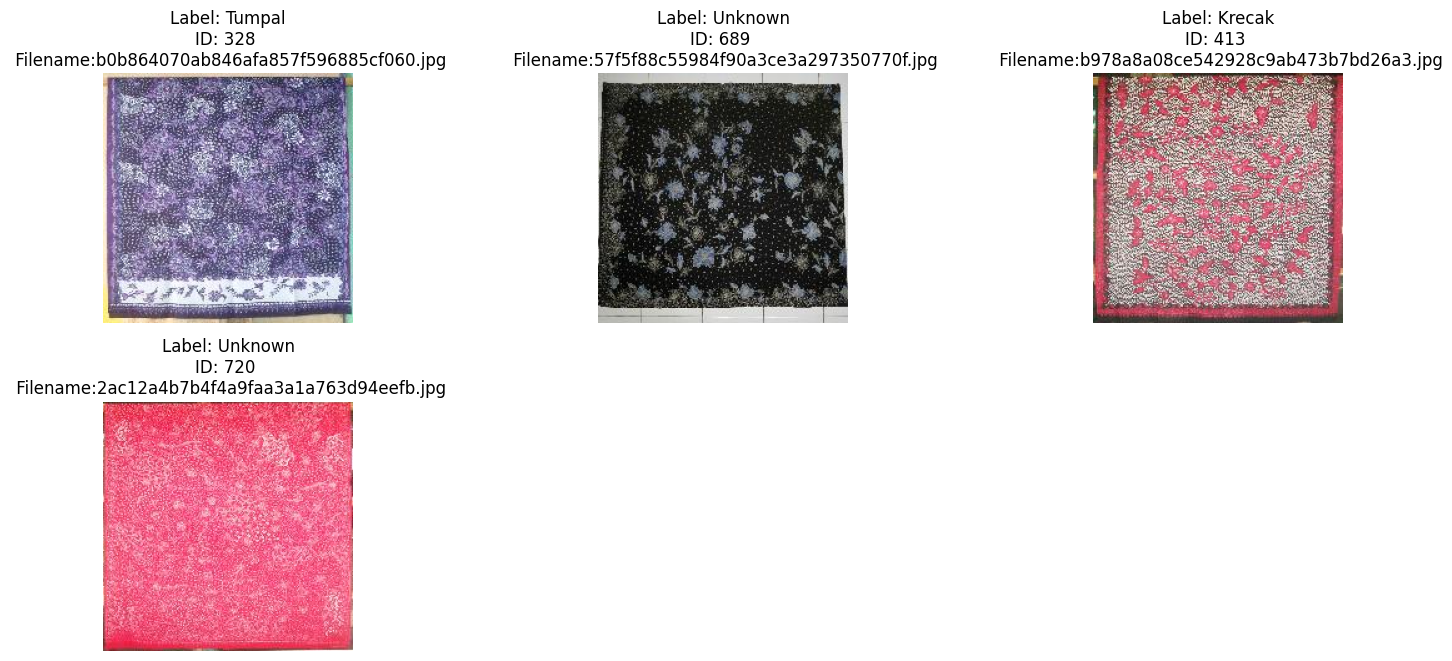

In [13]:
sample_df = train_df.sample(4, random_state=42)

plt.figure(figsize=(15, 10))

for i, (_, row) in enumerate(sample_df.iterrows()):
    img = mpimg.imread(row['image_path'])
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {row['label']}\nID: {row['id']} \n Filename:{row['filename']}")
    plt.axis('off')

plt.tight_layout()
plt.show()

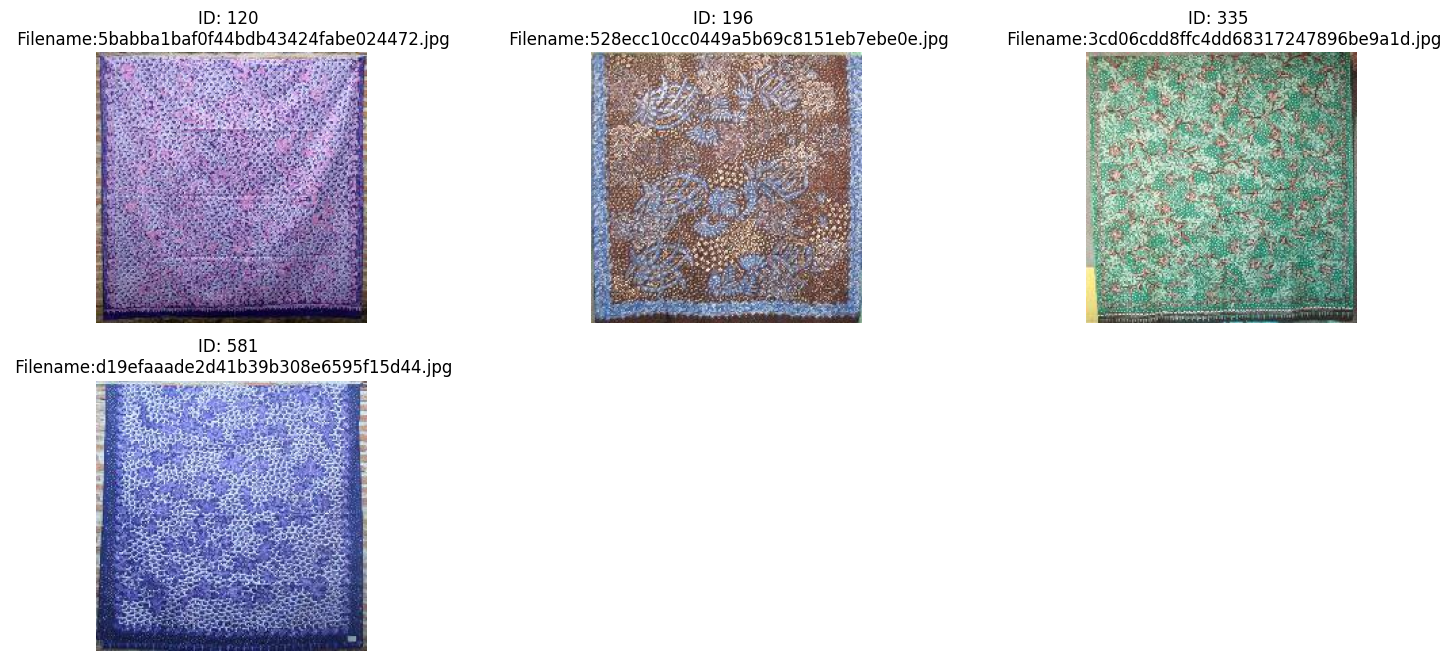

In [14]:
sample_test_df = test_df.sample(4, random_state=42)

plt.figure(figsize=(15, 10))

for i, (_, row) in enumerate(sample_test_df.iterrows()):
    img = mpimg.imread(row['image_path'])
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"ID: {row['id']} \n Filename:{row['filename']}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Check Label

In [15]:
label_counts = train_df["label"].value_counts().sort_values(ascending=False)

print(f"Jumlah label motif batik: {len(label_counts)}")
label_counts

Jumlah label motif batik: 12


label
Unknown           360
Latohan           318
Bledak            156
Aseman             85
Tumpal             78
Krecak             35
Kontemporer        25
Sekar Jagat        21
Gunung Ringgit     10
Naga                9
Siang Malam         3
Gringsing           1
Name: count, dtype: int64

### Data Distribution

In [16]:
label_percent = (label_counts / len(train_df)) * 100
imbalance_ratio = label_counts.max() / label_counts.min()

summary_df = pd.DataFrame({
    'Label': label_counts.index,
    'Count': label_counts.values,
    'Percentage': label_percent.values.round(2)
})
print("🔹 Label Distribution:")
print(summary_df)
print(f"\n Imbalance Ratio (max/min): {imbalance_ratio:.2f}x difference")

🔹 Label Distribution:
             Label  Count  Percentage
0          Unknown    360       32.70
1          Latohan    318       28.88
2           Bledak    156       14.17
3           Aseman     85        7.72
4           Tumpal     78        7.08
5           Krecak     35        3.18
6      Kontemporer     25        2.27
7      Sekar Jagat     21        1.91
8   Gunung Ringgit     10        0.91
9             Naga      9        0.82
10     Siang Malam      3        0.27
11       Gringsing      1        0.09

 Imbalance Ratio (max/min): 360.00x difference


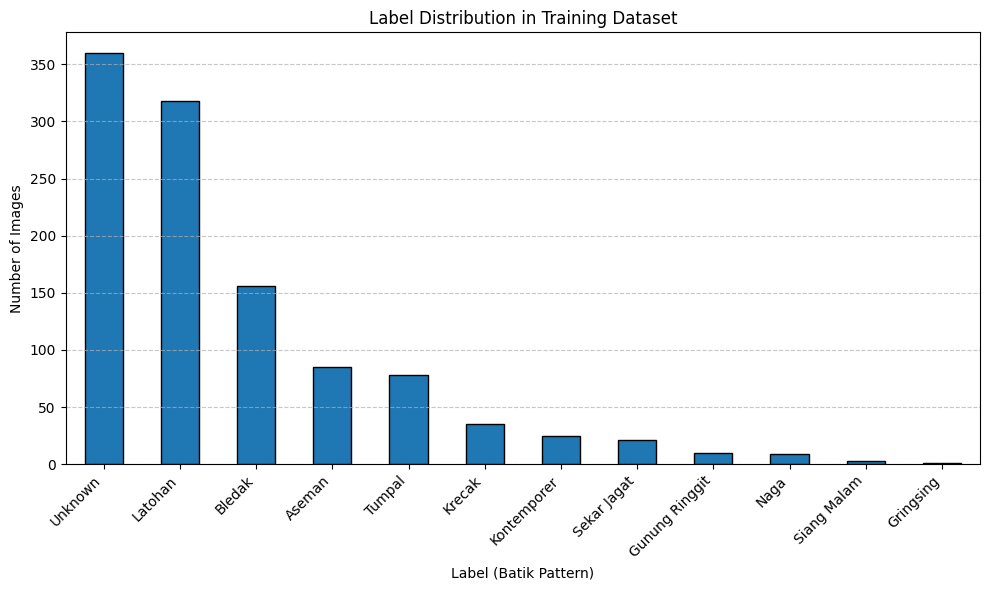

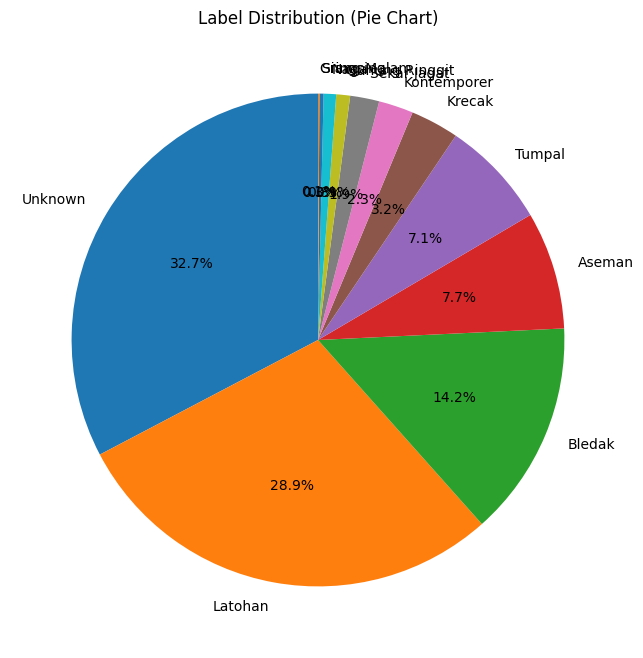

In [17]:
# BAR CHART
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='#1f77b4', edgecolor='black')
plt.title('Label Distribution in Training Dataset')
plt.xlabel('Label (Batik Pattern)')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# PIE CHART
plt.figure(figsize=(8,8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution (Pie Chart)')
plt.show()

In [20]:
counts = train_df['label'].value_counts()
buckets = {
    'very_tiny': counts[counts <= 5].index.tolist(),
    'small': counts[(counts > 5) & (counts <= 30)].index.tolist(),
    'medium': counts[(counts > 30) & (counts <= 100)].index.tolist(),
    'large': counts[counts > 100].index.tolist()
}
print({k: len(v) for k, v in buckets.items()})

{'very_tiny': 2, 'small': 4, 'medium': 3, 'large': 3}


# Data Preprocessing

In [18]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
RANDOM_STATE = 42

In [21]:
# Image Augmentation
strong_aug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.25),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

# Data Splitting

In [19]:
train_df, val_df = train_test_split(
    train_csv,
    test_size=0.2,
    stratify=train_csv["label"],
    random_state=RANDOM_STATE
)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

# Data Preprocessing

# Model Training

# Model Evaluation

## Plotting Graph

## Saving Predictions in CSV File